# STA365
Homework 2

---

### Question 1 
Complete the code below showing the sequential posterior distributions created as each observation is observed.

$$ 1. \ \textbf{Likelihood: Binomial} \ p(x | \theta, n) = \binom{n}{x} \theta^x (1 - \theta)^{n - x} \\
2. \ \textbf{Prior: Discrete Uniform} \ p(\theta) = 
\begin{cases}
\frac{1}{101}, & \text{for } \theta = \frac{i}{100}, \, i = 0, 1, \dots, 100 \\
0, & \text{otherwise}
\end{cases}
$$

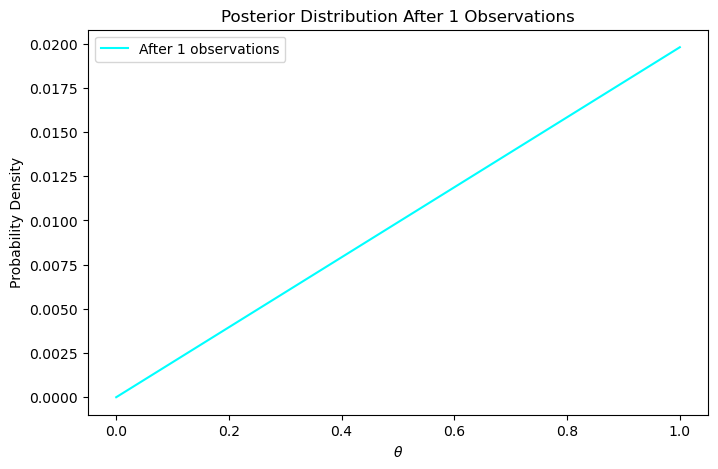

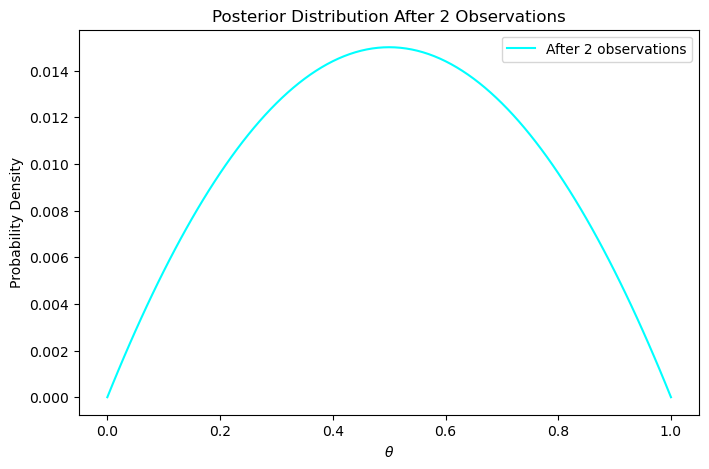

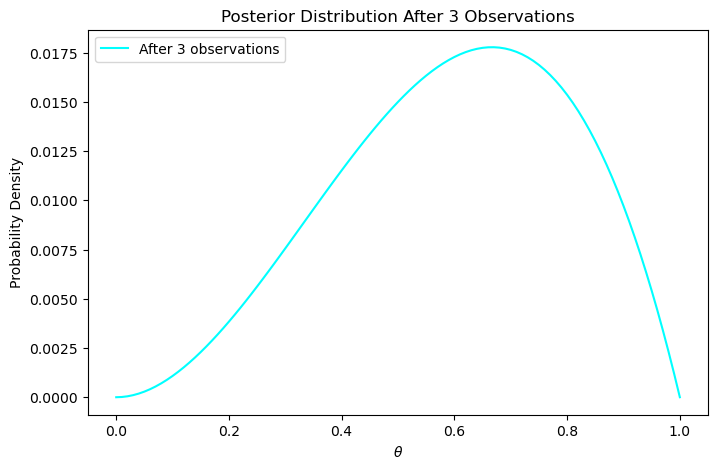

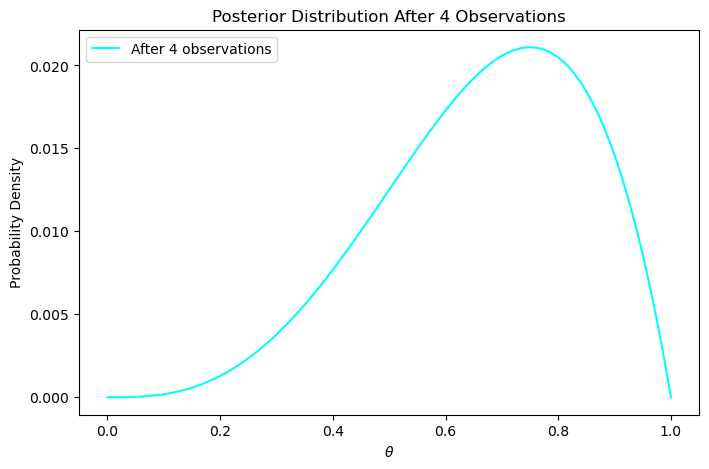

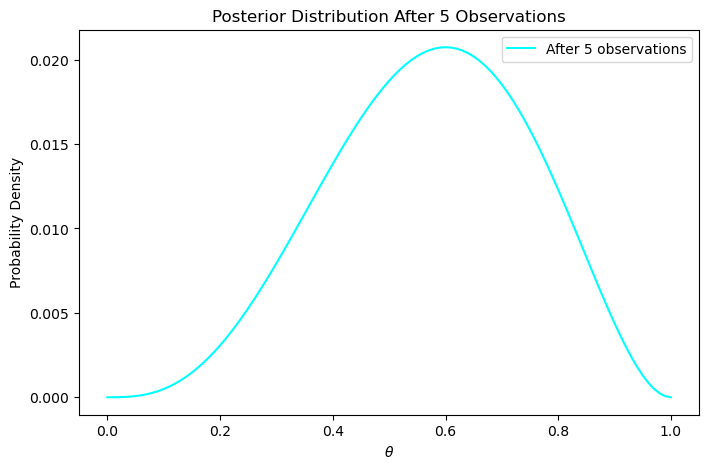

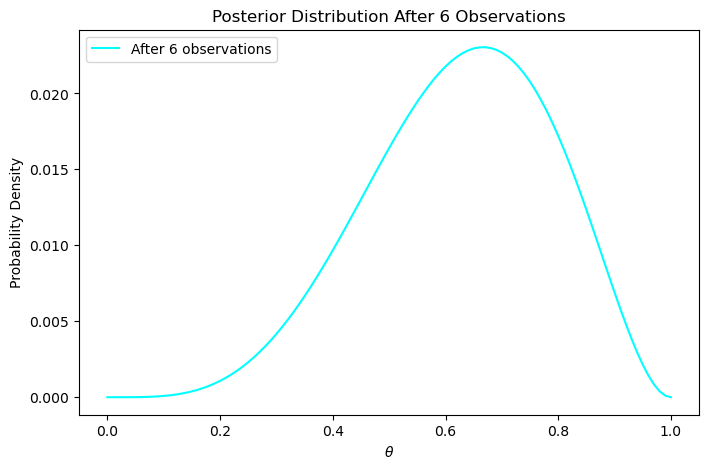

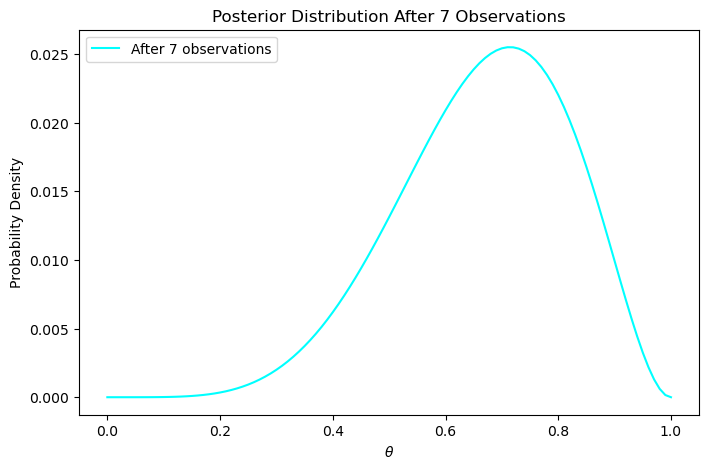

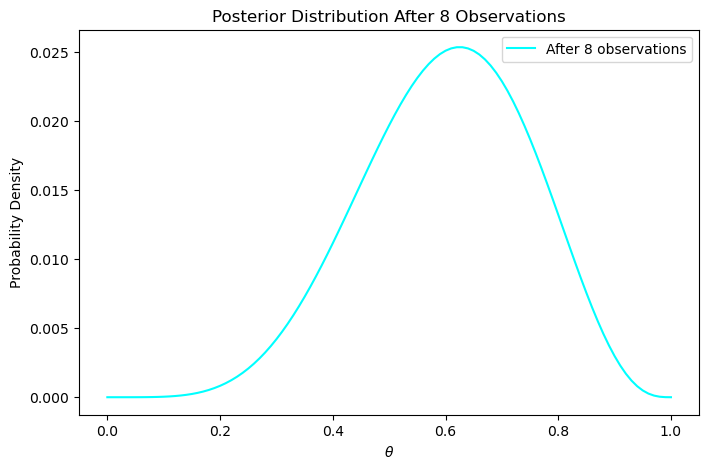

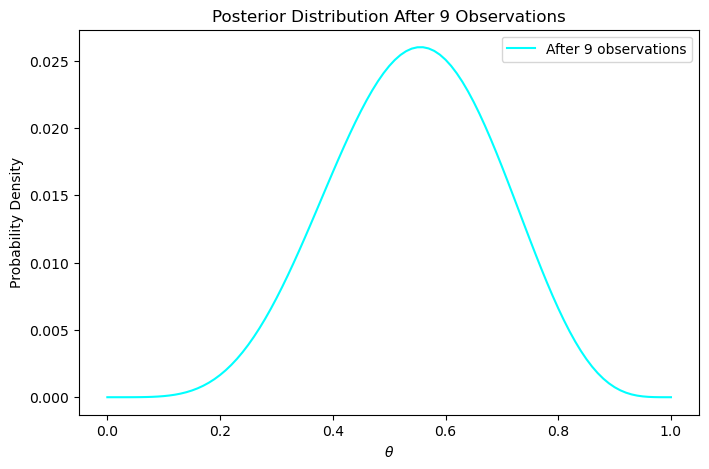

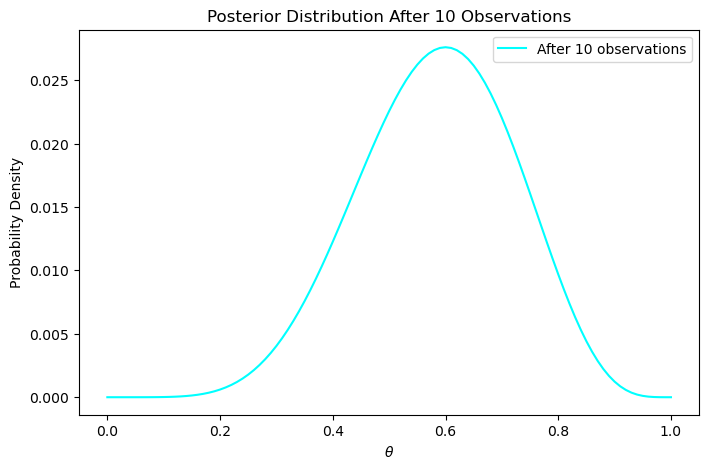

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Step 1: Define the discrete prior
theta_values = np.linspace(0, 1, 101)  # 101 evenly spaced values between 0 and 1
prior = np.ones_like(theta_values) / len(theta_values)  # Uniform prior

# Observations: 1 = success, 0 = failure
observations = [1, 0, 1, 1, 0, 1, 1, 0, 0, 1]

# Likelihood function using lambda
likelihood_values = lambda theta, x: binom.pmf(x, n=1, p=theta)


# Step 2: Sequentially update the posterior
posterior = prior.copy()  # Start with the prior
for i, obs in enumerate(observations):
    # Compute the likelihood for the current observation
    likelihood = likelihood_values(theta_values, obs)
    
    # Update posterior: Posterior ∝ Likelihood × Prior
    posterior = likelihood * posterior
    posterior /= np.sum(posterior)  # Normalize the posterior to sum to 1

    # Plot the posterior distribution
    plt.figure(figsize=(8, 5))
    plt.plot(theta_values, posterior, label=f"After {i+1} observations", color = 'cyan')
    plt.title(f"Posterior Distribution After {i+1} Observations")
    plt.xlabel(r"$\theta$")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

From the graph given, we see that the initial graph follows the prior which is a uniform distribution with equal  beliefs in all values between 0 and 1. After each observation, the posterior is updated with Bayes' Theorem. After each sequential update, the graph will accumulate the values of $\theta$ to get a better updated value for the posterior.

Since the prior is a uniform distribution, which is a special case of beta distribution with $\alpha = 1$ and$\beta = 1$, (ie, $X ~ Beta(1,1)$). Hence, as the binomial likelihood updates after every observation, we will get the posterior.

The $\textbf{Bayes' Theorem}$ can now be rewritten as follows:
$ \\ 1. \ \textbf{Binomial Likelihood} \ p(x | \theta, n) = \binom{n}{x} \theta^x (1 - \theta)^{n - x} = c\theta^x (1 - \theta)^{n - x}\\
2. \ \textbf{Prior Uniform Distribution} \ p(\theta) = c' \theta^{\alpha -1} (1 - \theta)^{\beta - 1}
$

Hence, the $\textbf{posterior}$ can be written as 
$$ \\ \begin{align*} 
p(\theta | x) &= \frac{p(x|\theta)p(\theta)}{p(x)} \\ \\
&= \frac{(c \cdot (\theta_{1}^{x_1}(1 - \theta_1)^{n-x_1}) \cdot (\theta_{2}^{x_2}(1 - \theta_2)^{n-x_2}) \cdot...(\theta_{k}^{x_k}(1 - \theta_k)^{n-x_k}))(c'\cdot (\theta_{1}^{\alpha_1 -1}(1 - \theta_1)^{\beta_1 -1})(\theta_{2}^{\alpha_2 -1}(1 - \theta_2)^{\beta_2 -1})...(\theta_{k}^{\alpha_k -1}(1 - \theta_k)^{\beta_k -1})}{c"} \\ \\
&= \frac{cc' \cdot (\theta_{1}^{x_1+\alpha_1 -1}\theta_{2}^{x_2+\alpha_2 -1}...\theta_{k}^{x_k+\alpha_k -1})((1-\theta_{1})^{n-x_1+\beta_1 -1}(1-\theta_{2})^{n-x_2+\beta_2 -1}...(1-\theta_{k})^{n-x_k+\beta_k -1})}{c"} \\ \\
&= \frac{cc'}{c"} \prod_{i=1}^{k} \theta_{i}^{x_i+ \alpha_i -1}(1-\theta_{i})^{n-x_i+\beta_i -1}
 \end{align*}$$

To simplify, we now get the posterior: $p(\theta | x) \propto \prod_{i=1}^{k} \theta_{i}^{x_i+ \alpha_i -1}(1-\theta_{i})^{n-x_i+\beta_i -1}$ which is a beta distribution of $Beta(x + \alpha, n-x + \beta).$ 

$\textbf{Conclusion}$ The sequential posterior distributions above has justified that the posterior distribution is a Beta dostribution with the parameters $\alpha' = \alpha + x$ and $\beta' = \beta + n - x$ where in this case, from the data simulated above, the number of success $x = 6$ and the number of failure is $n-x = 4$ and the posterior distribution is guaranteed to be proper if the prior is a proper distribution.

---

### Question 2
Return to the last few questions of the lecture and consider the question $\theta_1^{true} < \theta_2^{true}$.

1. Let the $(t)$ superscript indicate time and consider the posteriors $p(\theta_j | x_j^{(t)} , n_j^{(t)}) \propto \theta^{x_j^{(t)} + \alpha_j -1}((1-\theta)^{n - x_j^{(t)} + \beta_j -1})$. What is the distribution?


Answer: The posterior is a beta distribution with the parameters $\alpha'_j = x_j^{(t)} + \alpha_j$ and $\beta'_j = n - x_j^{(t)} + \beta_j$

2. Set $x_j^{(t)} =  n_j^{(t)} = 0$ and iterate time using for t in range(m):
3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where the chance of flipping based on is $Pr(\theta_1 < \theta_2 | x_1^{(t)} , n_1^{(t)}, x_2^{(t)} , n_2^{(t)})$

4. Update the $x_j^{(t+1)}$ and $n_j^{(t+1)}$ as appropriate.

5. If your algorithm is working then this will automatically learn which of $\theta_1^{true}$ and $\theta_2^{true}$ is larger

Provide some visualizations demonstrating the learning process that the algorithm undergoes.

Answer:

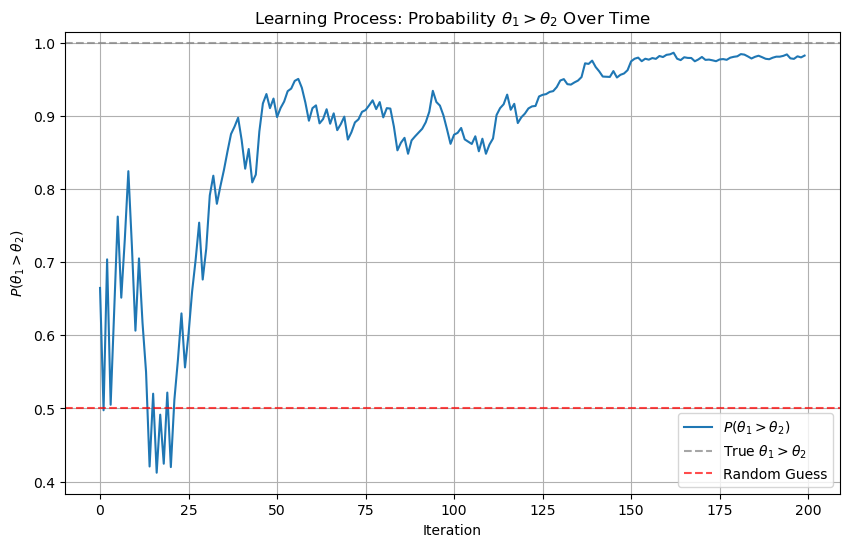

Final Posterior for Arm 1: Beta(132, 42)
Final Posterior for Arm 2: Beta(17, 13)


In [2]:
from scipy.stats import beta

# True success probabilities for the two arms
theta1_true = 0.7
theta2_true = 0.5

# Initialize priors for the two arms (Beta prior parameters)
alpha1, beta1 = 1, 1  # Arm 1
alpha2, beta2 = 1, 1  # Arm 2

# Number of iterations
m = 200

# Store probabilities for visualization
prob_theta1_greater_theta2 = []

# 2. Set $x_j^{(t)} =  n_j^{(t)} = 0$ and iterate time using for t in range(m):
n1, x1 = 0, 0  # Arm 1
n2, x2 = 0, 0  # Arm 2

for t in range(m):
    # 3. At each step flip a coin with success probability $\theta_1^{true}$ or $\theta_2^{true}$ where 
    # the chance of flipping based on is $Pr(\theta_1 < \theta_2 | x_1^{(t)} , n_1^{(t)}, x_2^{(t)} , n_2^{(t)})$
    # Sample from the posterior distributions of both arms
    theta1_sample = np.random.beta(alpha1, beta1)
    theta2_sample = np.random.beta(alpha2, beta2)

    # Choose the arm with the higher sampled value (Thompson Sampling)
    if theta1_sample > theta2_sample:
        chosen_arm = 1
    else:
        chosen_arm = 2

    # 4. Update the $x_j^{(t+1)}$ and $n_j^{(t+1)}$ as appropriate.
    # Simulate flipping the coin for the chosen arm
    if chosen_arm == 1:
        reward = np.random.rand() < theta1_true
        x1 += reward  # Update successes for arm 1
        n1 += 1       # Update trials for arm 1
        alpha1 += reward
        beta1 += 1 - reward
    else:
        reward = np.random.rand() < theta2_true
        x2 += reward  # Update successes for arm 2
        n2 += 1       # Update trials for arm 2
        alpha2 += reward
        beta2 += 1 - reward

    # Calculate the probability Pr(theta1 > theta2)
    theta1_posterior_samples = np.random.beta(alpha1, beta1, 10000)
    theta2_posterior_samples = np.random.beta(alpha2, beta2, 10000)
    prob_theta1_greater_theta2.append(np.mean(theta1_posterior_samples > theta2_posterior_samples))

# Visualization of the learning process
plt.figure(figsize=(10, 6))
plt.plot(range(m), prob_theta1_greater_theta2, label=r"$P(\theta_1 > \theta_2)$")
plt.axhline(1.0, color='gray', linestyle='--', alpha=0.7, label=r"True $\theta_1 > \theta_2$")
plt.axhline(0.5, color='red', linestyle='--', alpha=0.7, label="Random Guess")
plt.title(r"Learning Process: Probability $\theta_1 > \theta_2$ Over Time")
plt.xlabel("Iteration")
plt.ylabel(r"$P(\theta_1 > \theta_2)$")
plt.legend()
plt.grid()
plt.show()

# Final Posterior Parameters
print(f"Final Posterior for Arm 1: Beta({alpha1}, {beta1})")
print(f"Final Posterior for Arm 2: Beta({alpha2}, {beta2})")


---

### Question 3 
Generalize this process to a situation where there are three (not two) entitites with binary outcomes, each with differing chances of success of those binary outcomes. Compare two analyses simultaneously based on the same data:

Analysis 1: data for each entity is analyzed independently in the beta-binomial manner described above

Analysis 2: data for all entities is analyzed together using a single Dirichlet-multinomial model

Discuss which of the two approaches you think is most appropriate and describe an actual real world AB testing context where you could deploy this Bayesian multi-armed bandit to effectively balancing the exploration-exploitation tradeoff in that setting

Answer:

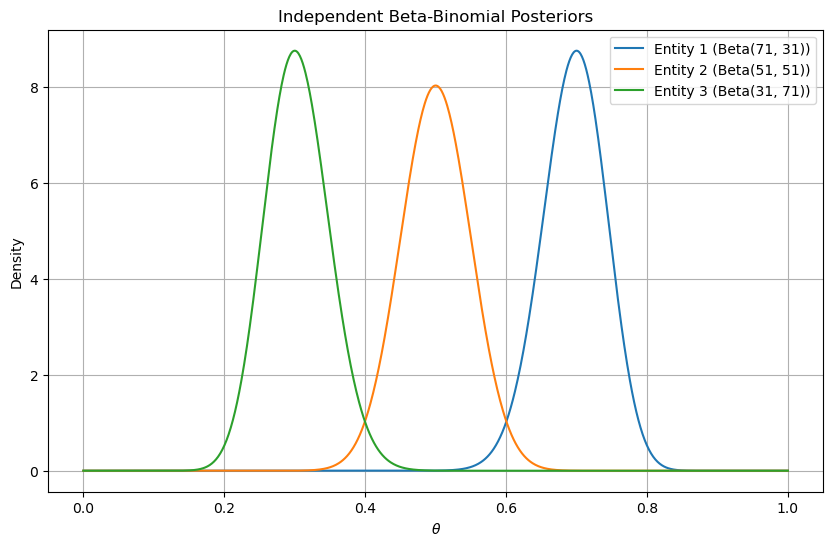

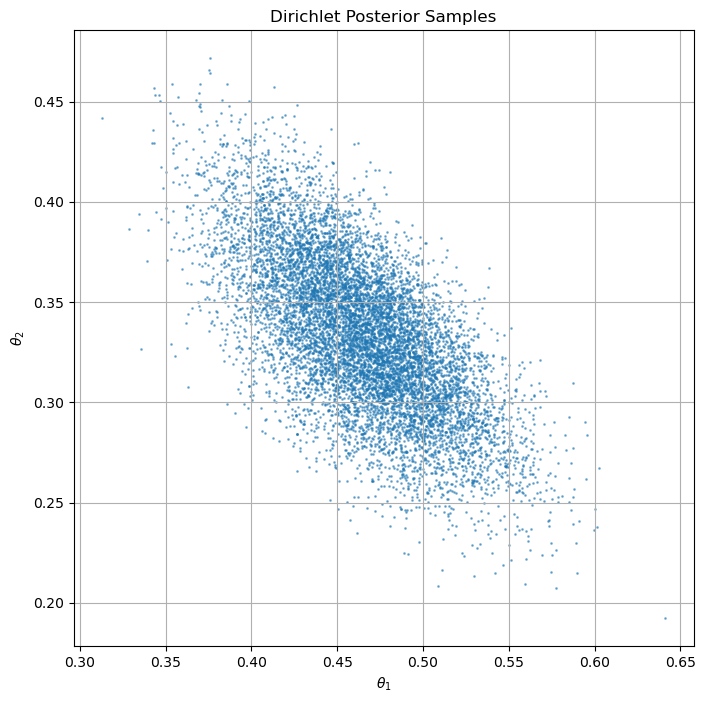

Analysis 1: Beta-Binomial Posterior Parameters
Entity 1: Beta(71, 31)
Entity 2: Beta(51, 51)
Entity 3: Beta(31, 71)

Analysis 2: Dirichlet-Multinomial Posterior Parameters
Dirichlet([71, 51, 31])


In [3]:
# Re-importing necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, dirichlet

# True probabilities for three entities (ground truth)
theta_true = [0.7, 0.5, 0.3]

# Observed data (number of successes for each entity)
n_trials = [100, 100, 100]  # Total trials for each entity
x_successes = [70, 50, 30]  # Observed successes

# -------------------------------------------------
# Analysis 1: Independent Beta-Binomial Models
# -------------------------------------------------
# Beta priors
alpha_prior = [1, 1, 1]  # Initial alpha for Beta prior
beta_prior = [1, 1, 1]   # Initial beta for Beta prior

# Compute posteriors for each entity
posterior_alphas = [alpha_prior[i] + x_successes[i] for i in range(3)]
posterior_betas = [beta_prior[i] + n_trials[i] - x_successes[i] for i in range(3)]

# Plot the posterior distributions
plt.figure(figsize=(10, 6))
x = np.linspace(0, 1, 1000)
for i in range(3):
    y = beta.pdf(x, posterior_alphas[i], posterior_betas[i])
    plt.plot(x, y, label=f"Entity {i+1} (Beta({posterior_alphas[i]}, {posterior_betas[i]}))")
plt.title("Independent Beta-Binomial Posteriors")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

# -------------------------------------------------
# Analysis 2: Joint Dirichlet-Multinomial Model
# -------------------------------------------------
# Dirichlet prior (uniform)
dirichlet_prior = [1, 1, 1]

# Update Dirichlet parameters with observed data
dirichlet_posterior = [dirichlet_prior[i] + x_successes[i] for i in range(3)]

# Generate samples from the Dirichlet posterior for visualization
dirichlet_samples = np.random.dirichlet(dirichlet_posterior, size=10000)

# Plot the Dirichlet posterior as a ternary plot (2D projection)
plt.figure(figsize=(8, 8))
plt.scatter(dirichlet_samples[:, 0], dirichlet_samples[:, 1], alpha=0.5, s=1)
plt.title("Dirichlet Posterior Samples")
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$")
plt.grid()
plt.show()

print("Analysis 1: Beta-Binomial Posterior Parameters")
for i in range(3):
    print(f"Entity {i+1}: Beta({posterior_alphas[i]}, {posterior_betas[i]})")

print("\nAnalysis 2: Dirichlet-Multinomial Posterior Parameters")
print(f"Dirichlet({dirichlet_posterior})")
